In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_features_106.csv")

# New Section

In [3]:
dataset.head(5)

,Subject Type/Class,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,n0_nogap_peak_ms,...,gap_auc_n1p2n2_by_total,gap_auc_p2n2p3_by_total,nogap_auc_total,nogap_auc_total_abs,nogap_auc_n0p1n1_by_total,nogap_auc_p1n1p2_by_total,nogap_auc_n1p2n2_by_total,nogap_auc_p2n2p3_by_total,fft_gap_total_auc,fft_nogap_total_auc
0,Healthy,Test,20ms,101,147,214,263,366,105,149,...,20.751953,0.038292,33.935547,15.285080,10.327331,1.672325,86.663602,1.333714,0.940225,0.074033
1,Healthy,Test,20ms,132,155,217,301,383,131,175,...,21.972656,0.118686,35.644531,15.548298,10.137840,3.010325,79.939031,1.775618,0.665121,0.227634
2,Healthy,Test,20ms,107,160,221,305,396,128,192,...,18.310547,0.048787,41.015625,13.078348,8.643543,2.167986,48.851014,1.769573,0.618907,0.093239
3,Healthy,Test,20ms,77,200,233,268,379,166,120,...,16.357422,0.062302,39.306641,7.087050,5.196947,3.325309,47.181061,0.831445,0.453683,0.119996
4,Healthy,Test,20ms,153,128,224,264,337,147,176,...,16.845703,0.100706,32.958984,15.198039,11.166206,2.334388,45.697755,1.665048,0.845292,0.192855


In [4]:
dataset.iloc[:, 0].value_counts()

Healthy     172
Tinnitus    158
Name: Subject Type/Class, dtype: int64

In [5]:
X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#GradientBoosting Classifier

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = GradientBoostingClassifier(n_estimators=4,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[31  8]
 [ 4 23]]
              precision    recall  f1-score   support

     Healthy       0.89      0.79      0.84        39
    Tinnitus       0.74      0.85      0.79        27

    accuracy                           0.82        66
   macro avg       0.81      0.82      0.82        66
weighted avg       0.83      0.82      0.82        66

Accurecy:  0.8181818181818182


#Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=18,max_depth=4,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[32  7]
 [ 7 20]]
              precision    recall  f1-score   support

     Healthy       0.82      0.82      0.82        39
    Tinnitus       0.74      0.74      0.74        27

    accuracy                           0.79        66
   macro avg       0.78      0.78      0.78        66
weighted avg       0.79      0.79      0.79        66

Accurecy:  0.7878787878787878


#Ada Boost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=54,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[35  4]
 [ 9 18]]
              precision    recall  f1-score   support

     Healthy       0.80      0.90      0.84        39
    Tinnitus       0.82      0.67      0.73        27

    accuracy                           0.80        66
   macro avg       0.81      0.78      0.79        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303


#XG

In [11]:


import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(max_depth=3,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[32  7]
 [ 9 18]]
              precision    recall  f1-score   support

     Healthy       0.78      0.82      0.80        39
    Tinnitus       0.72      0.67      0.69        27

    accuracy                           0.76        66
   macro avg       0.75      0.74      0.75        66
weighted avg       0.76      0.76      0.76        66

Accurecy:  0.7575757575757576


#KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=164)
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[39  0]
 [19  8]]
              precision    recall  f1-score   support

     Healthy       0.67      1.00      0.80        39
    Tinnitus       1.00      0.30      0.46        27

    accuracy                           0.71        66
   macro avg       0.84      0.65      0.63        66
weighted avg       0.81      0.71      0.66        66

Accurecy:  0.7121212121212122


#With Synthetic Data

**GradientBoosting**

NON RANDOM

In [13]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier


X, y = make_classification(random_state=0)

model_5 = GradientBoostingClassifier(n_estimators=9,max_depth=3,random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

n_scores = cross_val_score(model_5, X, y, scoring='accuracy', cv=cv)

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.883 (0.097)


Random

In [14]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_classification(random_state=1)

model_5 = GradientBoostingClassifier(n_estimators=9,max_depth=3,random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

n_scores = cross_val_score(model_5, X, y, scoring='accuracy', cv=cv)

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.953 (0.050)


#USING SMOTE

In [15]:
X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]


from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

**Gradient Boosting**

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = GradientBoostingClassifier(n_estimators=4,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[31  8]
 [ 4 23]]
              precision    recall  f1-score   support

     Healthy       0.89      0.79      0.84        39
    Tinnitus       0.74      0.85      0.79        27

    accuracy                           0.82        66
   macro avg       0.81      0.82      0.82        66
weighted avg       0.83      0.82      0.82        66

Accurecy:  0.8181818181818182


**Random Forest**

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=18,max_depth=4,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[31  8]
 [ 7 20]]
              precision    recall  f1-score   support

     Healthy       0.82      0.79      0.81        39
    Tinnitus       0.71      0.74      0.73        27

    accuracy                           0.77        66
   macro avg       0.77      0.77      0.77        66
weighted avg       0.77      0.77      0.77        66

Accurecy:  0.7727272727272727


**Ada Boosting**

In [19]:
from sklearn.ensemble import AdaBoostClassifier 

classifier = AdaBoostClassifier(n_estimators=54,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[35  4]
 [ 9 18]]
              precision    recall  f1-score   support

     Healthy       0.80      0.90      0.84        39
    Tinnitus       0.82      0.67      0.73        27

    accuracy                           0.80        66
   macro avg       0.81      0.78      0.79        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303


#SHAP Explanation


In [20]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 20.0 MB/s 


In [21]:
import shap

In [22]:

from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_features_106.csv')

encoder=LabelEncoder()
dataset["Subject Type/Class"]=encoder.fit_transform(dataset["Subject Type/Class"])


X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]





from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  

features_names=list(dataset.iloc[0:0, 3:])
print(features_names)




['n0_gap_peak_ms', 'p1_gap_peak_ms', 'n1_gap_peak_ms', 'p2_gap_peak_ms', 'n2_gap_peak_ms', 'p3_gap_peak_ms', 'n0_nogap_peak_ms', 'p1_nogap_peak_ms', 'n1_nogap_peak_ms', 'p2_nogap_peak_ms', 'n2_nogap_peak_ms', 'p3_nogap_peak_ms', 'n0p1_interval_gap', 'n0n1_interval_gap', 'n0p2_interval_gap', 'n0n2_interval_gap', 'n0p3_interval_gap', 'p1n1_interval_gap', 'p1p2_interval_gap', 'p1n2_interval_gap', 'p1p3_interval_gap', 'n1p2_interval_gap', 'n1n2_interval_gap', 'n1p3_interval_gap', 'p2n2_interval_gap', 'p2p3_interval_gap', 'n2p3_interval_gap', 'n0p1_interval_nogap', 'n0n1_interval_nogap', 'n0p2_interval_nogap', 'n0n2_interval_nogap', 'n0p3_interval_nogap', 'p1n1_interval_nogap', 'p1p2_interval_nogap', 'p1n2_interval_nogap', 'p1p3_interval_nogap', 'n1p2_interval_nogap', 'n1n2_interval_nogap', 'n1p3_interval_nogap', 'p2n2_interval_nogap', 'p2p3_interval_nogap', 'n2p3_interval_nogap', 'n0_gap_peak_amp', 'p1_gap_peak_amp', 'n1_gap_peak_amp', 'p2_gap_peak_amp', 'n2_gap_peak_amp', 'p3_gap_peak_amp

**Gradient Boosting**

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
classifier = GradientBoostingClassifier(n_estimators=4,random_state=0)
classifier.fit(X_train, y_train)




GradientBoostingClassifier(n_estimators=4, random_state=0)

In [24]:
explainer = shap.Explainer(classifier.predict, X_test)

shap_values = explainer( X_test)

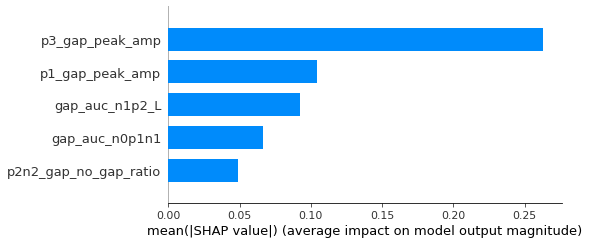

In [25]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=5,feature_names=features_names)

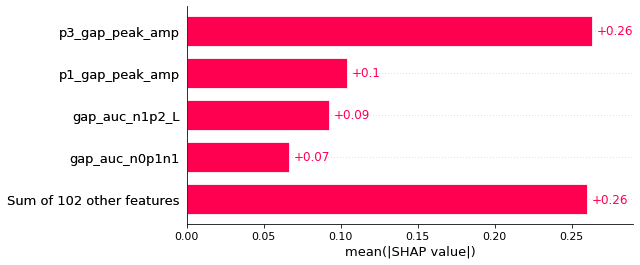

In [26]:
shap.plots.bar(shap_values,max_display=5)

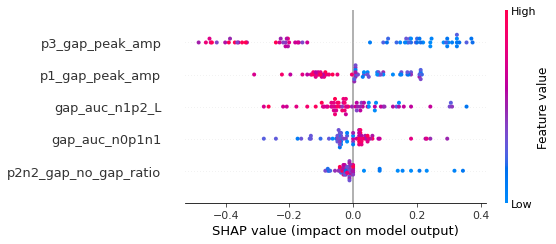

In [27]:
shap.summary_plot(shap_values,max_display=5,feature_names=features_names)

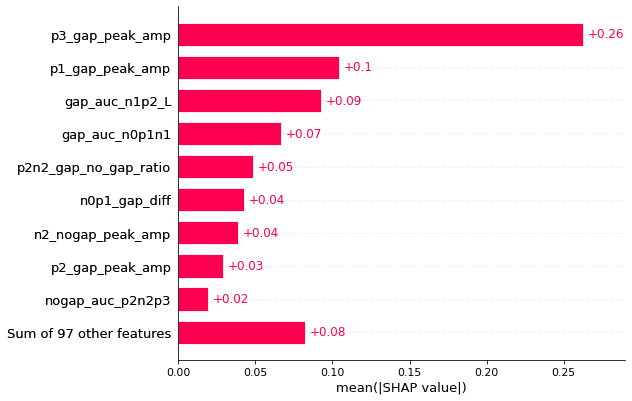

In [28]:
shap.plots.bar(shap_values)

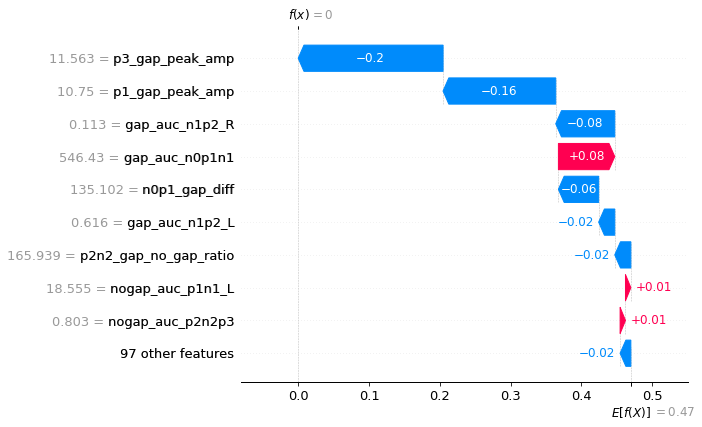

In [29]:
shap.plots.waterfall(shap_values[0])

In [30]:
shap.initjs()
shap.plots.force(shap_values[0],feature_names=features_names)

In [31]:
#explainer = shap.SamplingExplainer(KNN_class,X_test)
explainer = shap.KernelExplainer(classifier.predict_proba, X_train)
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
Using 264 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

In [32]:
shap.initjs()
# Force plot
prediction = classifier.predict(X_test[start_index:end_index])[0]
print(f"The  predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names=features_names)

The  predicted: 0


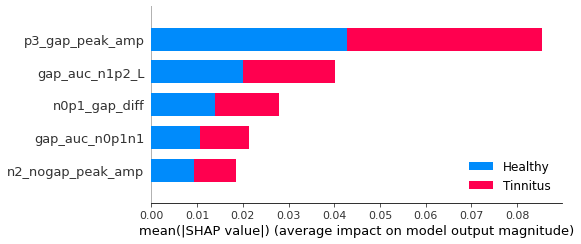

In [33]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=['Healthy','Tinnitus'],max_display=5,feature_names=features_names)

**Ada Boosting**

In [34]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=54,random_state=0)
classifier.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=54, random_state=0)

In [35]:
explainer = shap.Explainer(classifier.predict, X_test)

shap_values = explainer( X_test)

Permutation explainer: 67it [01:15,  1.24s/it]


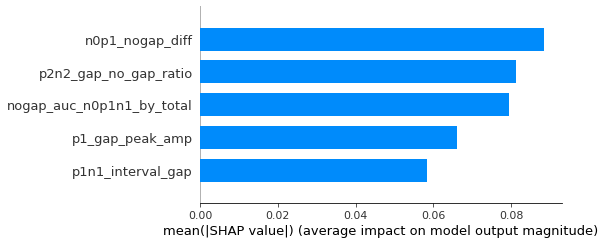

In [36]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=5,feature_names=features_names)

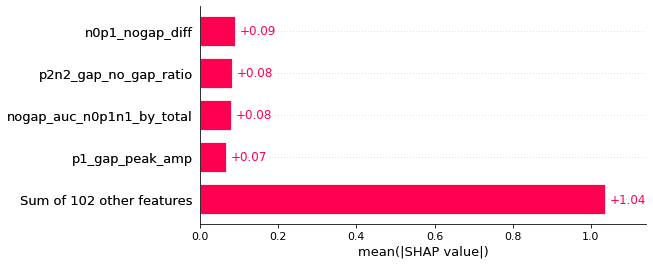

In [37]:
shap.plots.bar(shap_values,max_display=5)

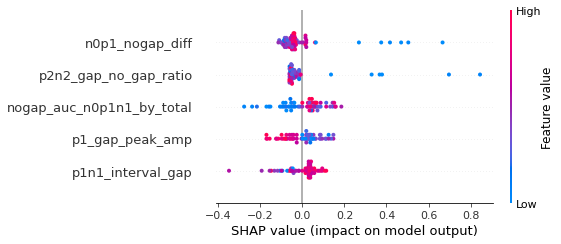

In [38]:
shap.summary_plot(shap_values,max_display=5,feature_names=features_names)

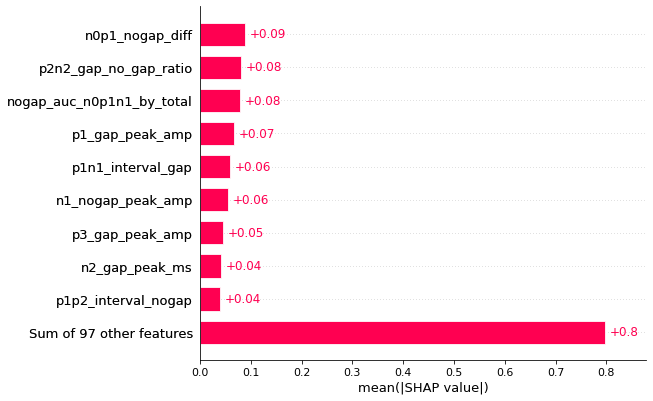

In [39]:
shap.plots.bar(shap_values)

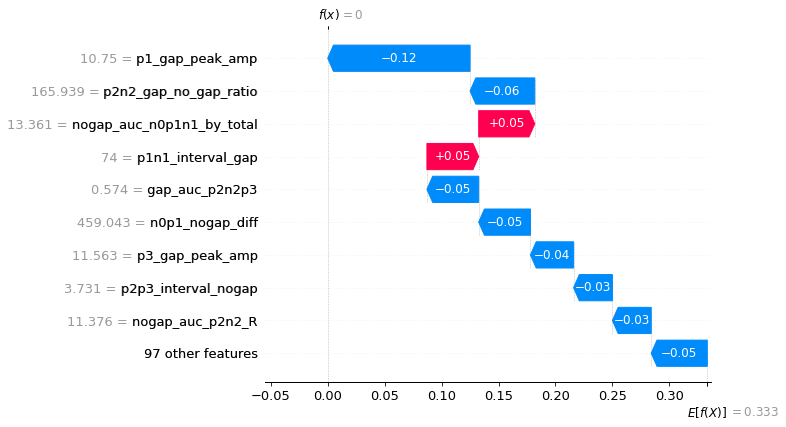

In [40]:
shap.plots.waterfall(shap_values[0])

In [41]:
shap.initjs()
shap.plots.force(shap_values[0],feature_names=features_names)

In [42]:
#explainer = shap.SamplingExplainer(KNN_class,X_test)
explainer = shap.KernelExplainer(classifier.predict_proba, X_train)
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
Using 264 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

In [43]:
shap.initjs()
# Force plot
prediction = classifier.predict(X_test[start_index:end_index])[0]
print(f"The  predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names=features_names)

The  predicted: 0


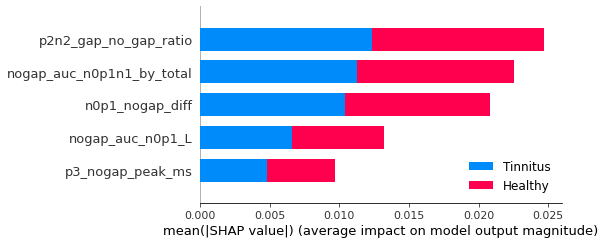

In [44]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=['Healthy','Tinnitus'],max_display=5,feature_names=features_names)

**Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=18,max_depth=4,random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=18, random_state=0)

In [46]:
explainer = shap.Explainer(classifier.predict, X_test)

shap_values = explainer( X_test)

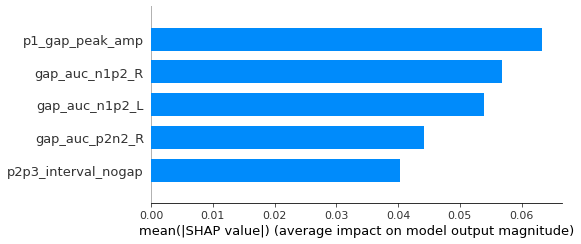

In [47]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=5,feature_names=features_names)

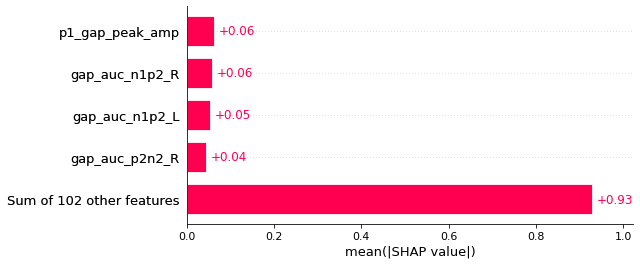

In [48]:
shap.plots.bar(shap_values,max_display=5)

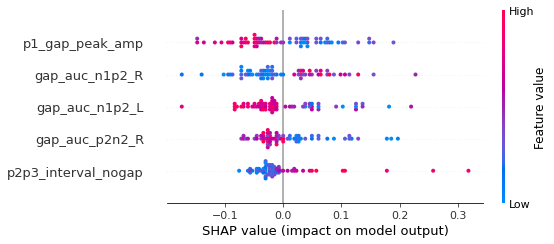

In [49]:
shap.summary_plot(shap_values,max_display=5,feature_names=features_names)

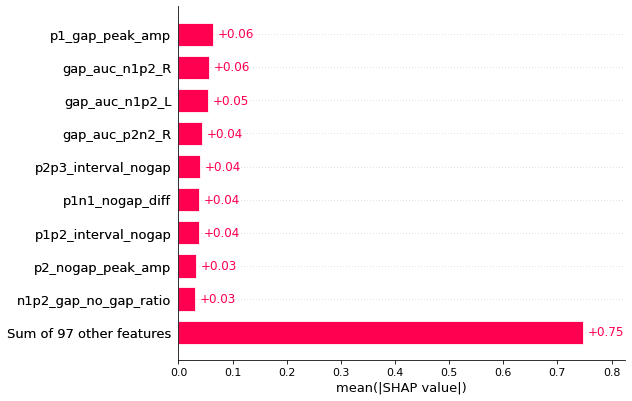

In [50]:
shap.plots.bar(shap_values)

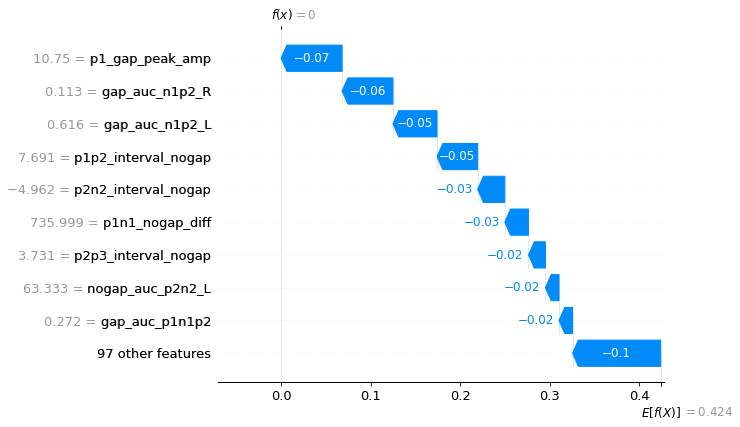

In [51]:
shap.plots.waterfall(shap_values[0])

In [52]:
shap.initjs()
shap.plots.force(shap_values[0],feature_names=features_names)

In [53]:
#explainer = shap.SamplingExplainer(KNN_class,X_test)
explainer = shap.KernelExplainer(classifier.predict_proba, X_train)
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
Using 264 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage.

In [54]:
shap.initjs()
# Force plot
prediction = classifier.predict(X_test[start_index:end_index])[0]
print(f"The  predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names=features_names)

The  predicted: 0


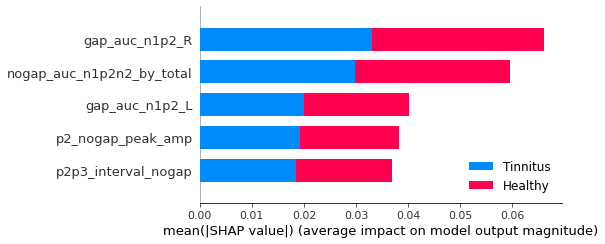

In [55]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=['Healthy','Tinnitus'],max_display=5,feature_names=features_names)